In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data_full_5sekres.xlsx')

In [3]:
df1 = df.copy()

In [87]:
#Create a column of load profile
df1['Load'] = df1['thrusterAndPropulsion']
df1['BaseLoad'] = 300
df1['Load'] = df1['thrusterAndPropulsion'] + df1['BaseLoad']

df1['Battery'] = 0
df1['SOC'] = 0
#Create dataset with only relevant columns
df2 = df1[['datetime', 'Load', 'engMdoPower_0_','engMdoPower_1_','engMdoPower_2_', 'engMdoPower_3_', 'operationId', 'BaseLoad', 'Battery', 'SOC']]

#Set engine powers to zero
num = df2['engMdoPower_0_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_1_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_2_']._get_numeric_data()
num[num != 0] = 0

num = df2['engMdoPower_3_']._get_numeric_data()
num[num != 0] = 0


display(df2)

,datetime,Load,engMdoPower_0_,engMdoPower_1_,engMdoPower_2_,engMdoPower_3_,operationId,BaseLoad,Battery,SOC
0,2020-01-30 00:00:00,300.0,0.0,0.0,0,0.0,6.0,300,0,0
1,2020-01-30 00:00:05,300.0,0.0,0.0,0,0.0,6.0,300,0,0
2,2020-01-30 00:00:10,300.0,0.0,0.0,0,0.0,6.0,300,0,0
3,2020-01-30 00:00:15,300.0,0.0,0.0,0,0.0,6.0,300,0,0
4,2020-01-30 00:00:20,300.0,0.0,0.0,0,0.0,6.0,300,0,0
...,...,...,...,...,...,...,...,...,...,...
120955,2020-02-05 23:59:35,1796.0,0.0,0.0,0,0.0,3.0,300,0,0
120956,2020-02-05 23:59:40,1743.2,0.0,0.0,0,0.0,3.0,300,0,0
120957,2020-02-05 23:59:45,1725.6,0.0,0.0,0,0.0,3.0,300,0,0
120958,2020-02-05 23:59:50,1760.8,0.0,0.0,0,0.0,3.0,300,0,0


In [88]:
load = df2['Load'].values
dg0 = df2['engMdoPower_0_'].values
dg1 = df2['engMdoPower_1_'].values
dg2 = df2['engMdoPower_2_'].values
dg3 = df2['engMdoPower_3_'].values
bat = df2['Battery'].values
soc = df2['SOC'].values
soc[0:100] = 496 #124 empty
#soc[10] = 496
opid = df2['operationId'].values

for i in range(len(load)):
    if i <= 5:
        pass
    elif i == 120959:
        pass
    elif load[i] <= 2100:
        if load[i]/load[i-2] > 1.5 or load[i] > 2000:
            if soc[i] > 124:
                bat[i] = 100
                soc[i+1] = soc[i] - (bat[i]/720)
                dg0[i] = load[i]-bat[i]
            else:
                dg0[i] = load[i]
                soc[i+1] = soc[i]
        else:
            dg0[i] = load[i]
            soc[i+1] = soc[i]
    else:
        soc[i+1] = soc[i] 
        

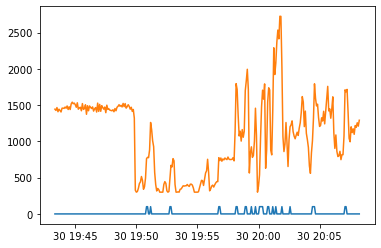

In [89]:
x = df2.iloc[14200:14500]['datetime']
plt.plot(x, bat[14200:14500])
plt.plot(x, load[14200:14500])
#plt.plot(x, dg0)

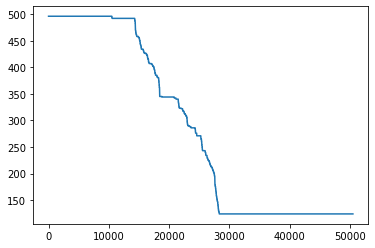

In [106]:
plt.plot(soc[0:50500])

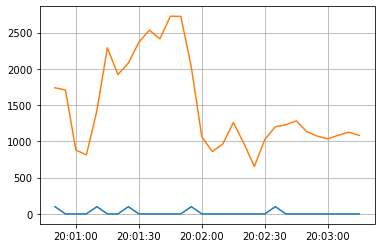

In [104]:
x = df2.iloc[14410:14440]['datetime']
plt.plot(x, bat[14410:14440])
plt.plot(x, load[14410:14440])
plt.grid()